## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.093498  0.678614  0.348908 -1.556692 -0.157292 -1.500695
1 -0.540288  1.232720 -1.725868  1.264717  0.403202  1.986085
2 -1.285276 -0.612119  1.401476 -0.700193 -0.520513 -1.027407
3  0.913916  0.576162  1.668151  0.583975 -0.193102  1.832342
4 -0.226123 -1.060376  0.619817  0.251551 -1.350869 -0.973474


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9991407	total: 46.6ms	remaining: 46.6s
1:	learn: 0.9855609	total: 47ms	remaining: 23.4s
2:	learn: 0.9745640	total: 47.4ms	remaining: 15.8s
3:	learn: 0.9626911	total: 47.8ms	remaining: 11.9s
4:	learn: 0.9498455	total: 48.2ms	remaining: 9.59s
5:	learn: 0.9380515	total: 48.6ms	remaining: 8.04s
6:	learn: 0.9259426	total: 48.9ms	remaining: 6.94s
7:	learn: 0.9143092	total: 49.4ms	remaining: 6.12s
8:	learn: 0.9040814	total: 49.8ms	remaining: 5.48s
9:	learn: 0.8932257	total: 50.2ms	remaining: 4.96s
10:	learn: 0.8836879	total: 50.5ms	remaining: 4.54s
11:	learn: 0.8730562	total: 50.8ms	remaining: 4.18s
12:	learn: 0.8629104	total: 51.2ms	remaining: 3.88s
13:	learn: 0.8548560	total: 51.5ms	remaining: 3.63s
14:	learn: 0.8463301	total: 51.8ms	remaining: 3.4s
15:	learn: 0.8382315	total: 52.2ms	remaining: 3.21s
16:	learn: 0.8295128	total: 52.5ms	remaining: 3.04s
17:	learn: 0.8205962	total: 52.9ms	remaining: 2.88s
18:	learn: 0.8106491	total: 53.2ms	remaining: 2

201:	learn: 0.1631468	total: 120ms	remaining: 472ms
202:	learn: 0.1618239	total: 120ms	remaining: 471ms
203:	learn: 0.1606762	total: 120ms	remaining: 469ms
204:	learn: 0.1593501	total: 121ms	remaining: 468ms
205:	learn: 0.1581715	total: 121ms	remaining: 466ms
206:	learn: 0.1570789	total: 121ms	remaining: 465ms
207:	learn: 0.1559752	total: 122ms	remaining: 463ms
208:	learn: 0.1548669	total: 122ms	remaining: 462ms
209:	learn: 0.1536864	total: 122ms	remaining: 460ms
210:	learn: 0.1525903	total: 123ms	remaining: 459ms
211:	learn: 0.1516097	total: 123ms	remaining: 458ms
212:	learn: 0.1502953	total: 124ms	remaining: 456ms
213:	learn: 0.1491523	total: 124ms	remaining: 455ms
214:	learn: 0.1480961	total: 124ms	remaining: 453ms
215:	learn: 0.1471846	total: 125ms	remaining: 452ms
216:	learn: 0.1460643	total: 125ms	remaining: 451ms
217:	learn: 0.1449931	total: 125ms	remaining: 449ms
218:	learn: 0.1438511	total: 126ms	remaining: 448ms
219:	learn: 0.1429429	total: 126ms	remaining: 446ms
220:	learn: 

484:	learn: 0.0328341	total: 221ms	remaining: 235ms
485:	learn: 0.0327385	total: 221ms	remaining: 234ms
486:	learn: 0.0325545	total: 222ms	remaining: 234ms
487:	learn: 0.0324607	total: 222ms	remaining: 233ms
488:	learn: 0.0323367	total: 222ms	remaining: 232ms
489:	learn: 0.0322446	total: 223ms	remaining: 232ms
490:	learn: 0.0320692	total: 223ms	remaining: 231ms
491:	learn: 0.0319452	total: 223ms	remaining: 231ms
492:	learn: 0.0318240	total: 224ms	remaining: 230ms
493:	learn: 0.0316811	total: 224ms	remaining: 229ms
494:	learn: 0.0315631	total: 224ms	remaining: 229ms
495:	learn: 0.0314928	total: 225ms	remaining: 228ms
496:	learn: 0.0314249	total: 225ms	remaining: 228ms
497:	learn: 0.0313294	total: 225ms	remaining: 227ms
498:	learn: 0.0312642	total: 226ms	remaining: 227ms
499:	learn: 0.0311388	total: 226ms	remaining: 226ms
500:	learn: 0.0310986	total: 226ms	remaining: 225ms
501:	learn: 0.0309871	total: 227ms	remaining: 225ms
502:	learn: 0.0308488	total: 227ms	remaining: 224ms
503:	learn: 

769:	learn: 0.0119294	total: 323ms	remaining: 96.5ms
770:	learn: 0.0118790	total: 323ms	remaining: 96.1ms
771:	learn: 0.0118528	total: 324ms	remaining: 95.7ms
772:	learn: 0.0118081	total: 324ms	remaining: 95.2ms
773:	learn: 0.0117824	total: 325ms	remaining: 94.8ms
774:	learn: 0.0117413	total: 325ms	remaining: 94.4ms
775:	learn: 0.0117160	total: 326ms	remaining: 94ms
776:	learn: 0.0116672	total: 326ms	remaining: 93.5ms
777:	learn: 0.0116393	total: 326ms	remaining: 93.1ms
778:	learn: 0.0116120	total: 327ms	remaining: 92.7ms
779:	learn: 0.0115686	total: 327ms	remaining: 92.3ms
780:	learn: 0.0115178	total: 328ms	remaining: 91.8ms
781:	learn: 0.0114970	total: 328ms	remaining: 91.4ms
782:	learn: 0.0114726	total: 328ms	remaining: 91ms
783:	learn: 0.0114312	total: 329ms	remaining: 90.5ms
784:	learn: 0.0113912	total: 329ms	remaining: 90.1ms
785:	learn: 0.0113764	total: 329ms	remaining: 89.7ms
786:	learn: 0.0113195	total: 330ms	remaining: 89.2ms
787:	learn: 0.0112931	total: 330ms	remaining: 88.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

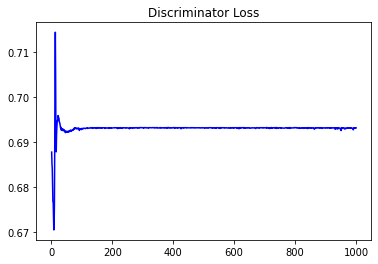

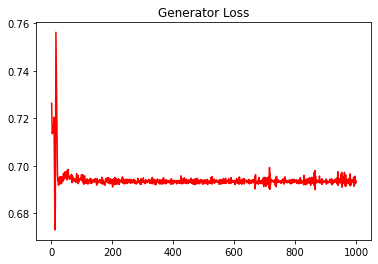

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.24357578344779496


#### Sanity Checks 

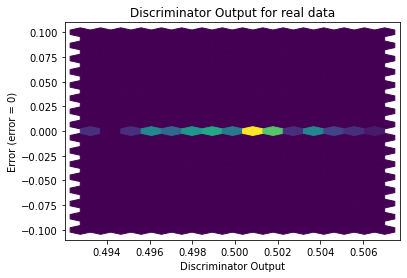

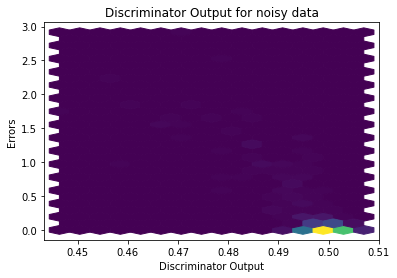

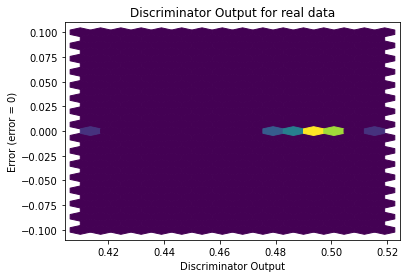

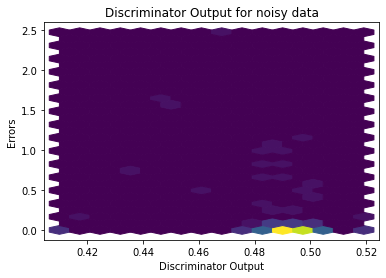

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


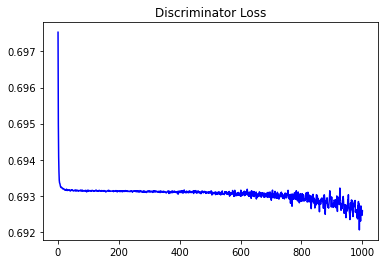

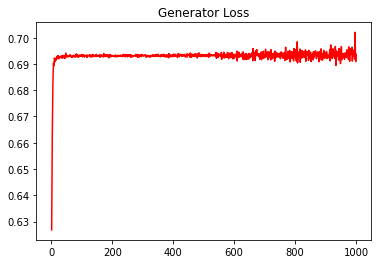

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.23825182264327727


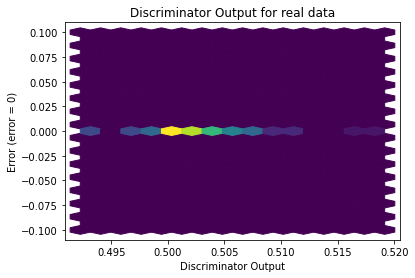

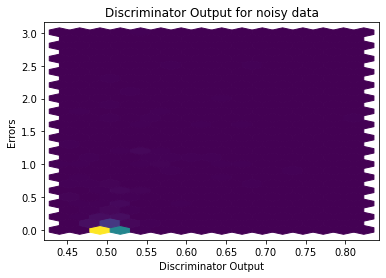

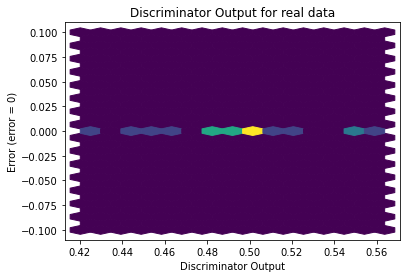

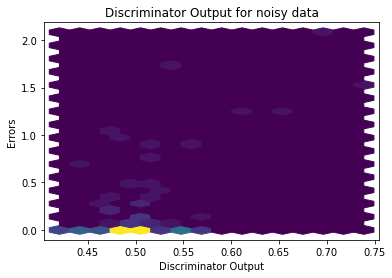

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
